<h1> Data Preprocessing</h1>

## Library Imports

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

## Data Imports

In [32]:
data=pd.read_csv('Weather.csv')

## EDA (Exploratory Data Analysis)

In [33]:
data.shape

(8784, 8)

In [34]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [36]:
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [37]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'], errors='coerce')

In [38]:
data = data.drop(columns=['Date/Time'])

In [39]:
data_numeric = data.drop(columns=['Weather']).apply(pd.to_numeric, errors='coerce')

## Handling Missing Value

In [40]:
data.isna().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [41]:
data_numeric.fillna(data_numeric.median(), inplace=True)

## Feature Engineering

## Handling Outlier

In [42]:
Q1 = data_numeric.quantile(0.25)
Q3 = data_numeric.quantile(0.75)
IQR = Q3 - Q1
data_clean = data_numeric[~((data_numeric < (Q1 - 1.5 * IQR)) | (data_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

In [43]:
data_clean['Weather'] = data.loc[data_clean.index, 'Weather']

In [44]:
le = LabelEncoder()
data_clean['Weather'] = le.fit_transform(data_clean['Weather'])

## Data Visualization

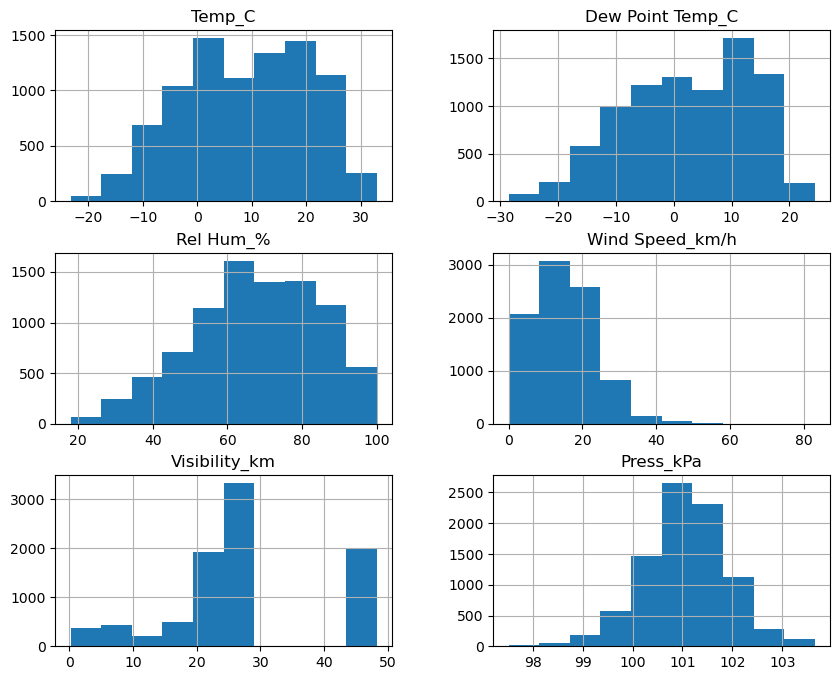

In [45]:
data.hist(figsize=(10, 8))
plt.show()

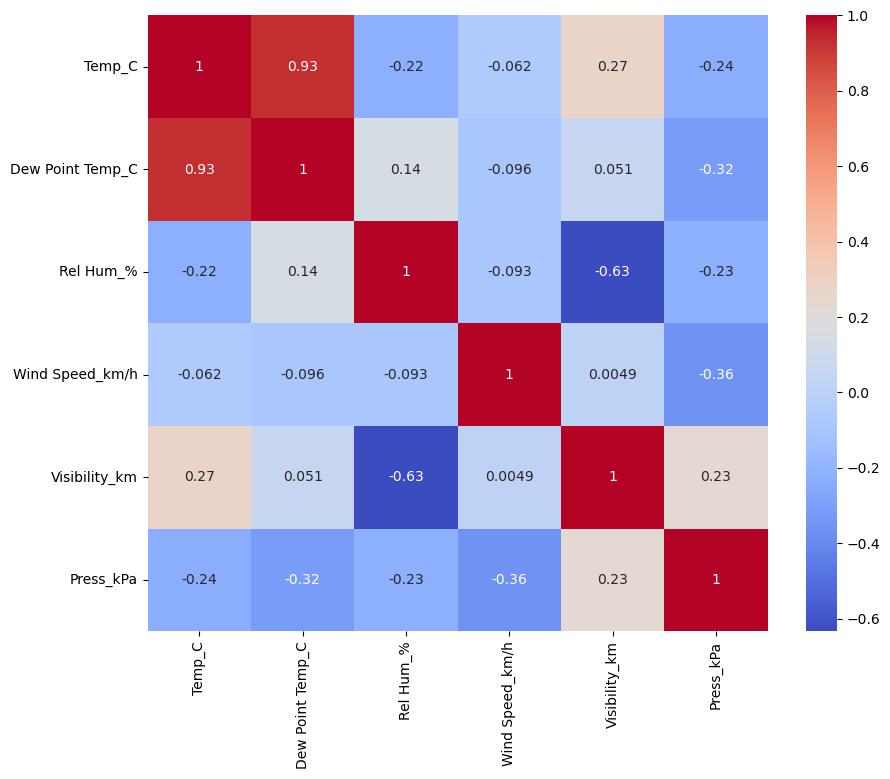

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

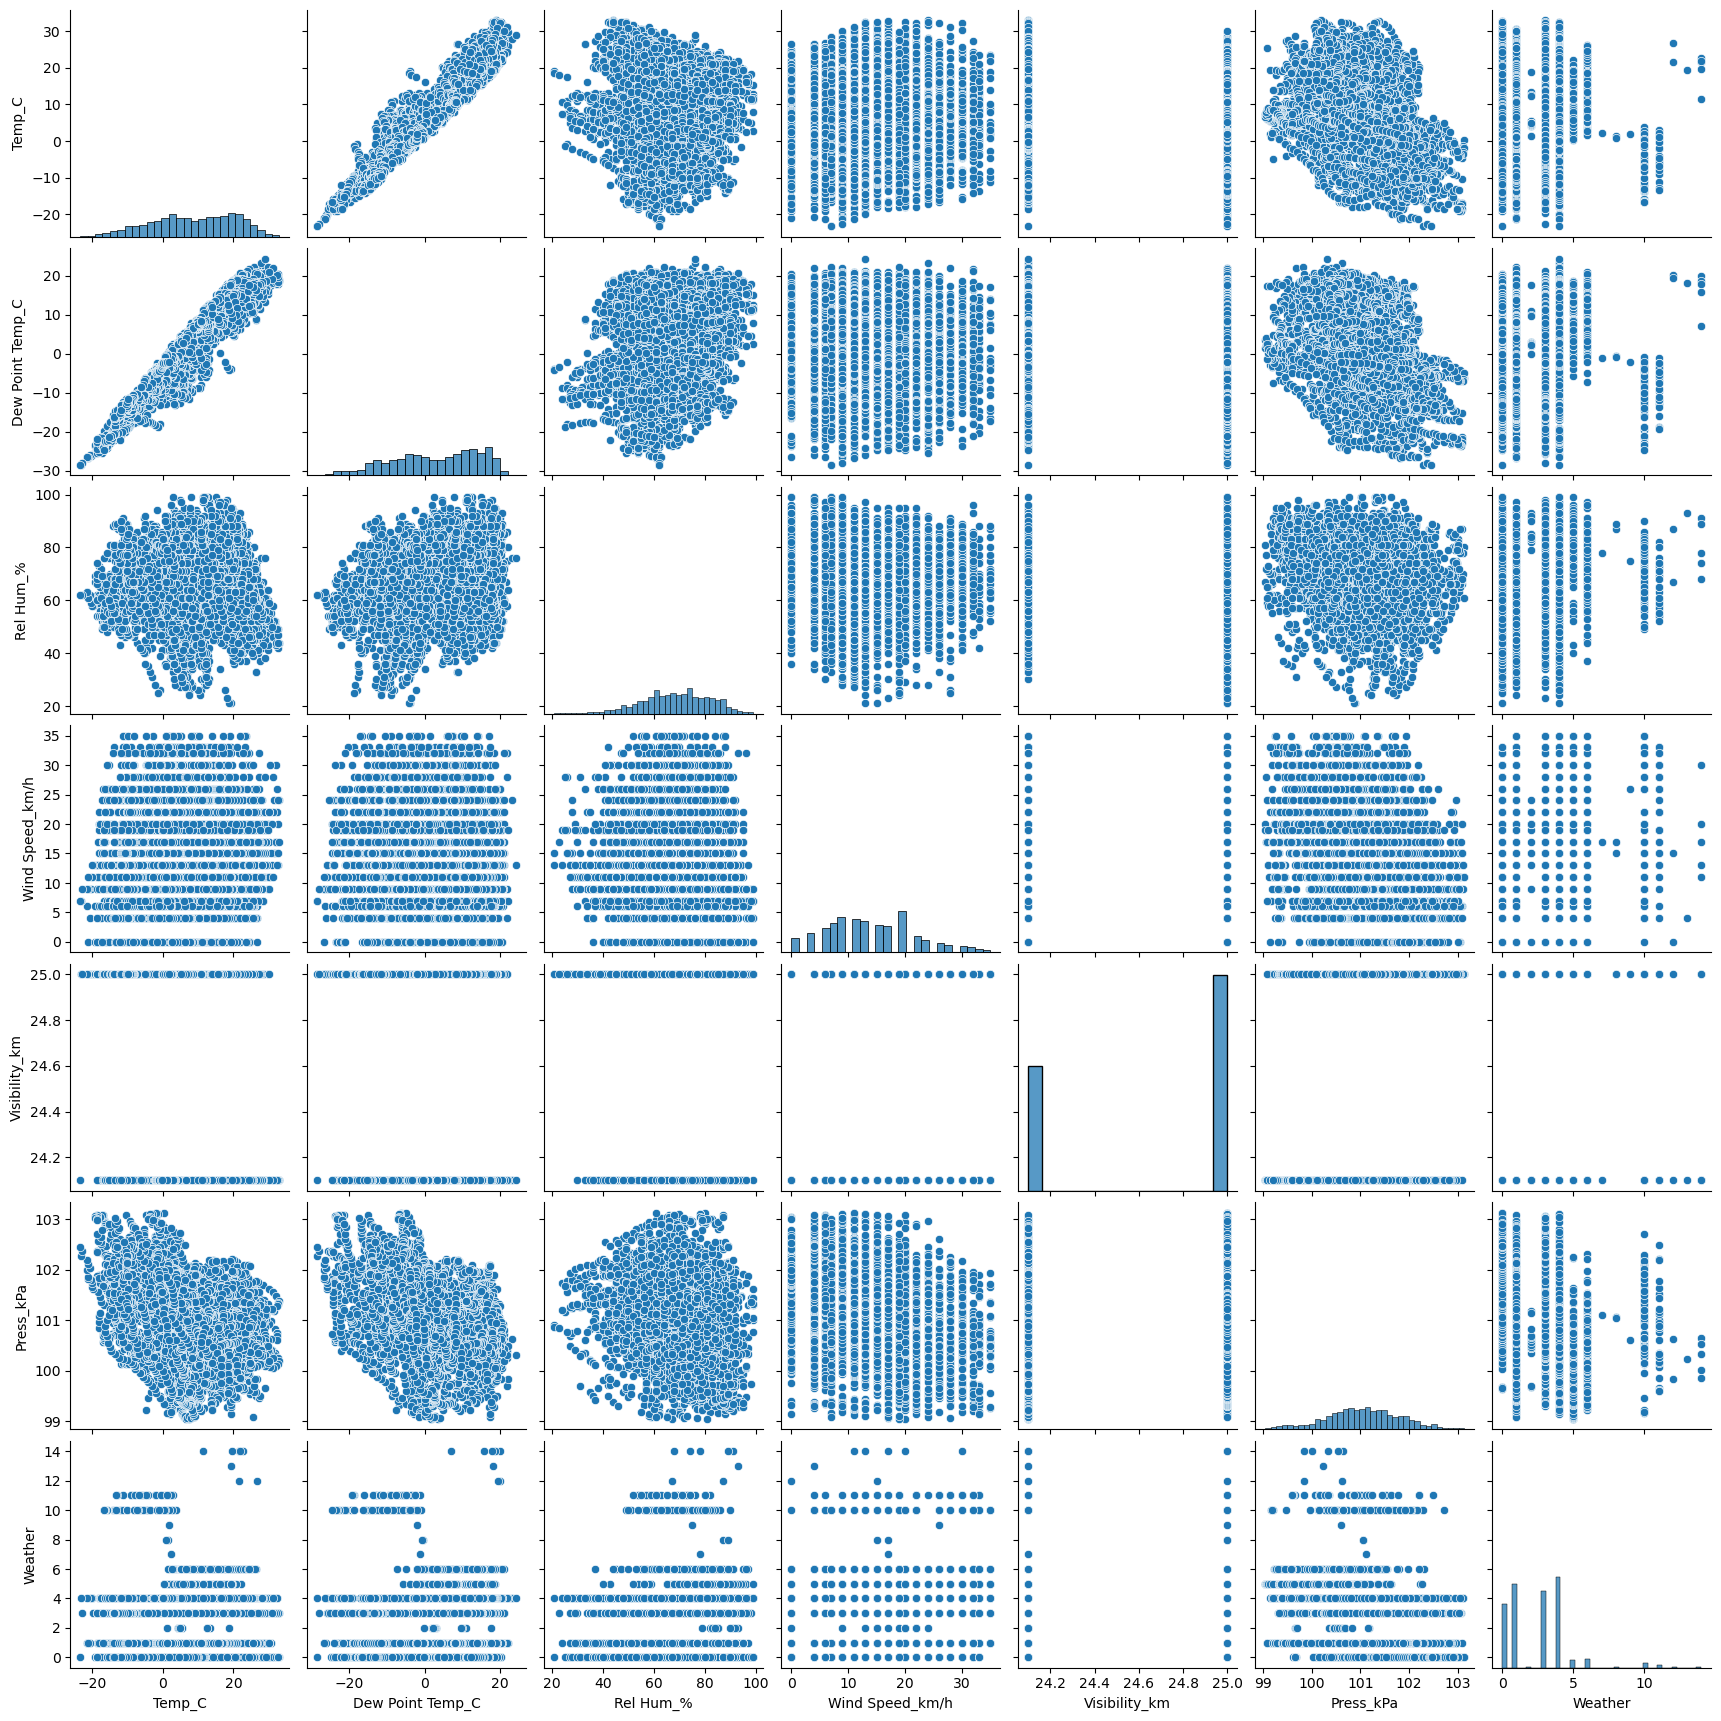

In [47]:
sns.pairplot(data_clean)
plt.show()

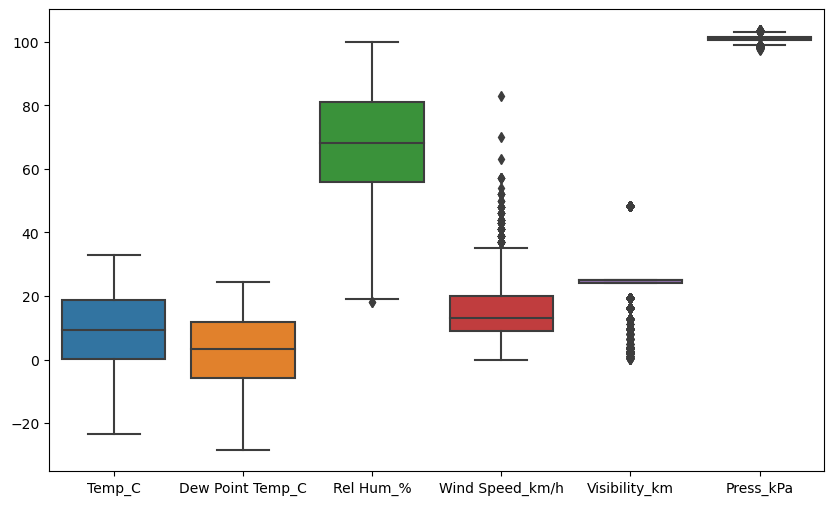

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_numeric)
plt.show()

# Model Building

In [52]:
X = data_clean.drop(columns=['Weather'])
y = data_clean['Weather'] 

## Train Test Split 

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Initalization

In [54]:
scaler = StandardScaler()

In [55]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
model = RandomForestClassifier(random_state=42)

## Model Training

In [57]:
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

## Hyper Parameter Tuining

# Evaluation and Result

In [58]:
y_pred = model.predict(X_test_scaled)

In [65]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 0.52


In [59]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[114  10   0  41  13   0   0   0   0   0   0   0]
 [  9 146   2  19  64   3   1   0   3   0   0   0]
 [  0   0   3   0   1   0   0   0   0   0   0   0]
 [ 36  19   0 110  51   1   0   0   0   0   0   0]
 [ 22  68   0  55 145   3   2   0   1   0   0   0]
 [  1  11   0   1   3   7   0   0   0   0   0   0]
 [  3  12   0   1   7   0   1   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0]
 [  2   5   0   2   5   0   0   0   3   0   0   0]
 [  0   2   0   0   2   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   1   0   0   0   0   0   0   0]]


In [60]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.64      0.62       178
           1       0.53      0.59      0.56       247
           2       0.60      0.75      0.67         4
           3       0.48      0.51      0.49       217
           4       0.50      0.49      0.49       296
           5       0.50      0.30      0.38        23
           6       0.25      0.04      0.07        24
           9       0.00      0.00      0.00         1
          10       0.43      0.18      0.25        17
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2

    accuracy                           0.52      1014
   macro avg       0.32      0.29      0.29      1014
weighted avg       0.51      0.52      0.51      1014



In [61]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

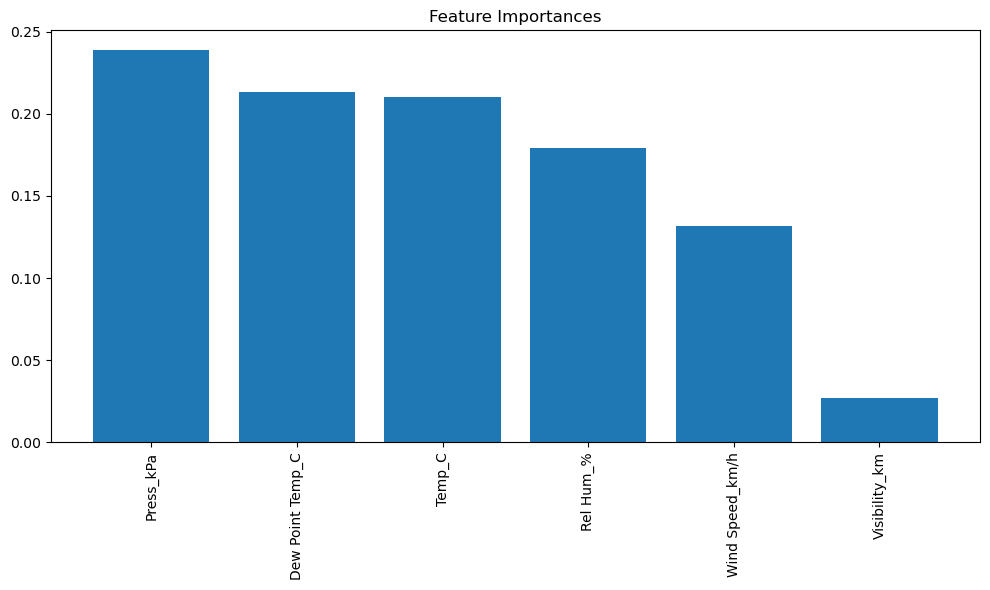

In [62]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

# Error

ValueError: could not convert string to float: '1/1/2012 0:00'

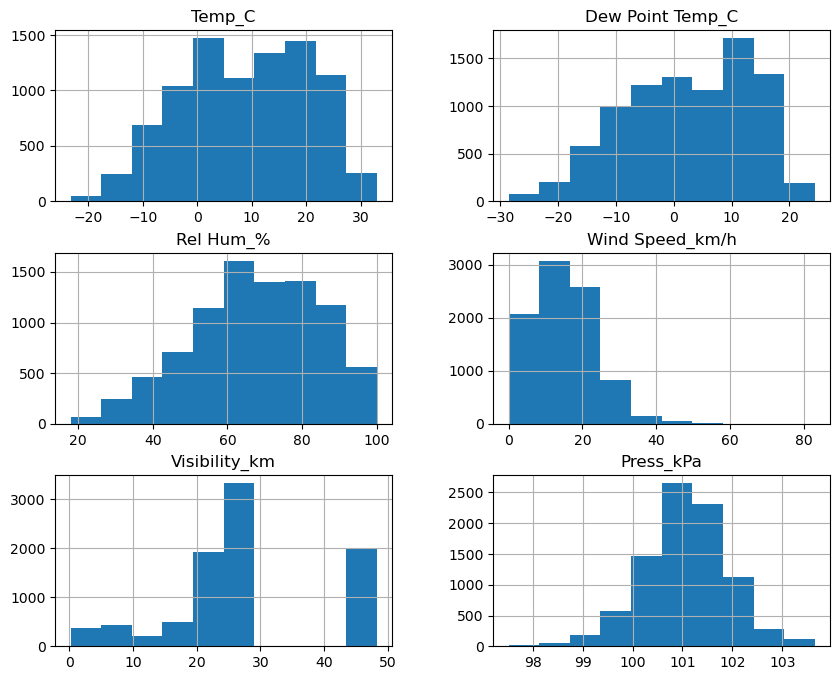

<Figure size 1000x800 with 0 Axes>

In [20]:
data.hist(figsize=(10, 8))
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


# Research